In [3]:
import pandas as pd

In [5]:
covid_df = pd.read_csv("C:\ABC\data\dados_df_imputados_0722.csv", sep=",")
covid_df

,Data,Data Cadastro,Sexo,Faixa Etária,RA,UF,Óbito,Data do Óbito,dataPrimeirosintomas,Idade,Pneumopatia,Nefropatia,Doença Hematológica,Distúrbios Metabólicos,Imunopressão,Obesidade,Outros,Cardiovasculopatia
0,19/07/2022,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Não,NaN,2020-04-23,55,Não,Não,Não,Não,Não,Não,Não,Não
1,19/07/2022,2020-03-18,Masculino,50 a 59 anos,Plano Piloto,DISTRITO FEDERAL,Não,NaN,2020-08-03,53,Não,Não,Não,Não,Não,Não,Não,Não
2,19/07/2022,2020-03-18,Masculino,40 a 49 anos,Lago Sul,DISTRITO FEDERAL,Não,NaN,2020-03-09,48,Não,Não,Não,Não,Não,Não,Não,Não
3,19/07/2022,2020-03-18,Masculino,>= 60 anos,Águas Claras,DISTRITO FEDERAL,Não,NaN,2020-03-14,64,Não,Não,Não,Sim,Não,Não,Não,Sim
4,19/07/2022,2020-03-18,Feminino,30 a 39 anos,Plano Piloto,DISTRITO FEDERAL,Não,NaN,2020-03-14,30,Não,Não,Não,Não,Não,Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825955,19/07/2022,2022-07-19,Feminino,40 a 49 anos,Outros Estados,GOIÁS,Não,NaN,2022-01-31,41,Não,Não,Não,Não,Não,Não,Não,Não
825956,19/07/2022,2022-07-19,Feminino,30 a 39 anos,Águas Claras,DISTRITO FEDERAL,Não,NaN,2022-01-12,30,Não,Não,Não,Não,Não,Não,Não,Não
825957,19/07/2022,2022-07-19,Feminino,40 a 49 anos,Sobradinho,DISTRITO FEDERAL,Não,NaN,2022-02-09,48,Não,Não,Não,Não,Não,Não,Não,Não
825958,19/07/2022,2022-07-19,Feminino,50 a 59 anos,Cruzeiro,DISTRITO FEDERAL,Não,NaN,2022-02-08,51,Não,Não,Não,Não,Não,Não,Não,Não


In [6]:
import numpy as np

In [7]:
covid_df.shape

(825960, 18)

In [8]:
np.sum((covid_df["Cardiovasculopatia"] == "Sim") & (covid_df["Obesidade"] == "Sim"))

1720

In [9]:
np.sum(covid_df["Obesidade"] == "Sim")

5054

Probabilidade de Cardiovasculopatia | Obesidade = ?

P(C|O) = P (C e O )/P(O)

P(C)

P(O)

P(C|(O e A)) = P (C e O e A )/P(O e A)


In [7]:
1549 / 4241

0.3652440462155152

In [10]:
def get_probs(f1, val_f1, f2, val_f2, dataset):
    # returns P(f1 | f2)
    and_prob = np.sum((covid_df[f1] == val_f1) & (covid_df[f2] == val_f2))
    return and_prob/np.sum(covid_df[f2] == val_f2)

In [11]:
def get_probs_3(f1, val_f1, f2, val_f2, f3, val_f3, dataset):
    # returns P(f1 | f2 & f3)
    and_prob = np.sum((covid_df[f1] == val_f1) & (covid_df[f2] == val_f2) & (covid_df[f3] == val_f3))
    return and_prob/np.sum((covid_df[f2] == val_f2) & (covid_df[f3] == val_f3))

In [44]:
np.sum((covid_df["Nefropatia"] == "Sim") & (covid_df["Cardiovasculopatia"] == "Não") & (covid_df["Pneumopatia"] == "Não") & (covid_df["Doença Hematológica"] == "Não") & (covid_df["Distúrbios Metabólicos"] == "Não") & (covid_df["Imunopressão"] == "Não") & (covid_df["Obesidade"] == "Não") & (covid_df["Outros"] == "Não"))

664

In [26]:
np.sum(covid_df["Cardiovasculopatia"] == "Não")

799569

In [12]:
# Prob óbito
np.sum(covid_df["Óbito"] == "Sim")/len(covid_df["Óbito"])

0.014297302532810306

In [13]:
len(covid_df["Óbito"])

825960

In [11]:
# Masculino
get_probs("Óbito", "Sim", "Sexo", "Masculino", covid_df) * 100

1.8559334423868936

In [12]:
# Feminino
get_probs("Óbito", "Sim", "Sexo", "Feminino", covid_df) * 100

1.096349744415219

In [13]:
# Pneumopatia
get_probs("Óbito", "Sim", "Pneumopatia", "Sim", covid_df) * 100

15.996168582375478

In [14]:
# Nefropatia
get_probs("Óbito", "Sim", "Nefropatia", "Sim", covid_df) * 100

45.75678040244969

In [15]:
# Doença Hematológica
get_probs("Óbito", "Sim", "Doença Hematológica", "Sim", covid_df) * 100

13.490725126475548

In [16]:
# Distúrbios Metabólicos
get_probs("Óbito", "Sim", "Distúrbios Metabólicos", "Sim", covid_df) * 100

26.775192856708983

In [17]:
# Imunopressão
get_probs("Óbito", "Sim", "Imunopressão", "Sim", covid_df) * 100

23.042876901798063

In [18]:
# Obesidade
get_probs("Óbito", "Sim", "Obesidade", "Sim", covid_df) * 100

35.338345864661655

In [19]:
# Outros
get_probs("Óbito", "Sim", "Outros", "Sim", covid_df) * 100

31.029126213592235

In [20]:
# Cardiovasculopatia
get_probs("Óbito", "Sim", "Cardiovasculopatia", "Sim", covid_df) * 100

27.75946345345004

In [21]:
get_probs_3("Óbito", "Sim", "Sexo", "Masculino", "Cardiovasculopatia", "Sim", covid_df) * 100

33.52050365832908

In [22]:
sexes = [("Sexo", "Masculino"), ("Sexo", "Feminino")]
diseases =  [
    ("Pneumopatia", "Sim"), 
    ("Nefropatia", "Sim"), 
    ("Doença Hematológica", "Sim"),
    ("Distúrbios Metabólicos", "Sim"),
    ("Imunopressão", "Sim"),
    ("Obesidade", "Sim"),
    ("Outros", "Sim"),
    ("Cardiovasculopatia", "Sim"),
]

In [23]:
for sex in sexes:
    for disease in diseases:
        print(sex[1], disease[0])
        print(get_probs_3("Óbito", "Sim", *sex, *disease, covid_df) * 100)

Masculino Pneumopatia
21.29768699309102
Masculino Nefropatia
50.6859756097561
Masculino Doença Hematológica
16.728624535315987
Masculino Distúrbios Metabólicos
32.791059555807045
Masculino Imunopressão
29.68036529680365
Masculino Obesidade
40.83769633507853
Masculino Outros
39.06458797327394
Masculino Cardiovasculopatia
33.52050365832908
Feminino Pneumopatia
12.482580131395581
Feminino Nefropatia
39.1170431211499
Feminino Doença Hematológica
10.802469135802468
Feminino Distúrbios Metabólicos
22.24824355971897
Feminino Imunopressão
18.155619596541786
Feminino Obesidade
31.42566881137826
Feminino Outros
24.819277108433734
Feminino Cardiovasculopatia
23.13315570130491


In [24]:
TOTAL = 825960

In [25]:
covid_df.groupby("RA").size()

RA
                            162
Arniqueira                 3414
Brazlândia                12804
Candangolândia             3664
Ceilândia                 71558
Cruzeiro                  10438
Entorno DF                 2795
Fercal                     1178
Gama                      33893
Guará                     43638
Itapoã                     5080
Jardim Botânico           10468
Lago Norte                13843
Lago Sul                  15331
Não Informado                19
Núcleo Bandeirante         6575
Outros Estados            89164
Paranoá                   12435
Park Way                   7777
Planaltina                27414
Plano Piloto             134837
Pôr do Sol                 5276
Recanto das Emas          17452
Riacho Fundo              10336
Riacho Fundo II            7412
SCIA                       4108
SIA                         206
Samambaia                 41658
Santa Maria               21368
Sistema Penitenciário      2299
Sobradinho                35102
Sobra

In [26]:
covid_df[covid_df["Óbito"] == "Sim"].groupby("RA").size()

RA
Arniqueira                 66
Brazlândia                239
Candangolândia             73
Ceilândia                1615
Cruzeiro                  116
Entorno DF                 63
Fercal                      7
Gama                      699
Guará                     536
Itapoã                     74
Jardim Botânico            86
Lago Norte                124
Lago Sul                  122
Núcleo Bandeirante        126
Outros Estados            967
Paranoá                   221
Park Way                   80
Planaltina                622
Plano Piloto              870
Pôr do Sol                157
Recanto das Emas          392
Riacho Fundo              201
Riacho Fundo II           125
SCIA                       55
Samambaia                 870
Santa Maria               484
Sistema Penitenciário       7
Sobradinho                563
Sobradinho II             117
Sudoeste/Octogonal        126
São Sebastião             238
Taguatinga               1128
Varjão                     28
Vicente

In [27]:
# Probabilidade de ser da RA dado que morreu
covid_df[covid_df["Óbito"] == "Sim"].groupby("RA").size().divide(np.sum(covid_df["Óbito"] == "Sim")).mul(100)

RA
Arniqueira                0.558896
Brazlândia                2.023880
Candangolândia            0.618173
Ceilândia                13.676010
Cruzeiro                  0.982302
Entorno DF                0.533491
Fercal                    0.059277
Gama                      5.919214
Guará                     4.538911
Itapoã                    0.626641
Jardim Botânico           0.728258
Lago Norte                1.050047
Lago Sul                  1.033110
Núcleo Bandeirante        1.066983
Outros Estados            8.188670
Paranoá                   1.871454
Park Way                  0.677449
Planaltina                5.267169
Plano Piloto              7.367262
Pôr do Sol                1.329494
Recanto das Emas          3.319502
Riacho Fundo              1.702092
Riacho Fundo II           1.058515
SCIA                      0.465746
Samambaia                 7.367262
Santa Maria               4.098569
Sistema Penitenciário     0.059277
Sobradinho                4.767550
Sobradinho II    

In [28]:
# Probabilidade de morrer dado que é da RA
covid_df[covid_df["Óbito"] == "Sim"].groupby("RA").size().divide(covid_df.groupby("RA").size()).mul(100)

RA
                              NaN
Arniqueira               1.933216
Brazlândia               1.866604
Candangolândia           1.992358
Ceilândia                2.256910
Cruzeiro                 1.111324
Entorno DF               2.254025
Fercal                   0.594228
Gama                     2.062373
Guará                    1.228287
Itapoã                   1.456693
Jardim Botânico          0.821551
Lago Norte               0.895760
Lago Sul                 0.795773
Não Informado                 NaN
Núcleo Bandeirante       1.916350
Outros Estados           1.084518
Paranoá                  1.777242
Park Way                 1.028674
Planaltina               2.268914
Plano Piloto             0.645223
Pôr do Sol               2.975739
Recanto das Emas         2.246161
Riacho Fundo             1.944659
Riacho Fundo II          1.686454
SCIA                     1.338851
SIA                           NaN
Samambaia                2.088434
Santa Maria              2.265069
Sistema Pen

In [29]:
get_probs("Óbito", "Sim", "RA", "Ceilândia", covid_df) * 100

2.2569104782134772

In [30]:
# Probabilidade de morrer dado a idade
covid_df[covid_df["Óbito"] == "Sim"].groupby("Faixa Etária").size().divide(covid_df.groupby("Faixa Etária").size()).mul(100)

Faixa Etária
20 a 29 anos    0.094476
30 a 39 anos    0.235325
40 a 49 anos    0.599888
50 a 59 anos    1.409586
<= 19 anos      0.032909
>= 60 anos      7.116416
dtype: float64

In [31]:
# Probabilidade de ter a faixa etária dado que morreu
covid_df[covid_df["Óbito"] == "Sim"].groupby("Faixa Etária").size().divide(np.sum(covid_df["Óbito"] == "Sim")).mul(100)

Faixa Etária
20 a 29 anos     1.024642
30 a 39 anos     3.827589
40 a 49 anos     9.585909
50 a 59 anos    14.361927
<= 19 anos       0.220171
>= 60 anos      70.979761
dtype: float64

In [32]:
ages = ['<= 19 anos', '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '>= 60 anos']
mapping = {et: i for i, et in enumerate(ages)}

In [33]:
mulher_df = covid_df[covid_df["Sexo"] == "Feminino"]
homem_df = covid_df[covid_df["Sexo"] == "Masculino"]

In [34]:
# Probabilidade de morrer dado a idade para mulheres
mulher_df[mulher_df["Óbito"] == "Sim"].groupby("Faixa Etária").size().divide(mulher_df.groupby("Faixa Etária").size()).mul(100)

Faixa Etária
20 a 29 anos    0.068539
30 a 39 anos    0.139530
40 a 49 anos    0.395991
50 a 59 anos    0.990010
<= 19 anos      0.036961
>= 60 anos      5.669384
dtype: float64

In [35]:
# Probabilidade de morrer dado a idade para homens
homem_df[homem_df["Óbito"] == "Sim"].groupby("Faixa Etária").size().divide(homem_df.groupby("Faixa Etária").size()).mul(100)

Faixa Etária
20 a 29 anos    0.128801
30 a 39 anos    0.362772
40 a 49 anos    0.864441
50 a 59 anos    1.938065
<= 19 anos      0.028629
>= 60 anos      9.000645
dtype: float64

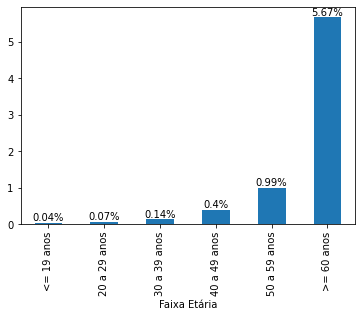

In [36]:
df = mulher_df[mulher_df["Óbito"] == "Sim"].groupby("Faixa Etária").size().divide(mulher_df.groupby("Faixa Etária").size()).mul(100)
df['Faixa Etária'] = df.index
key = df['Faixa Etária'].map(mapping)
ax = df.iloc[key.argsort()].plot(kind="bar")
for p in ax.patches:
    ax.annotate(
        f"{np.round(p.get_height(),decimals=2)}%", 
        (p.get_x()+p.get_width()/2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

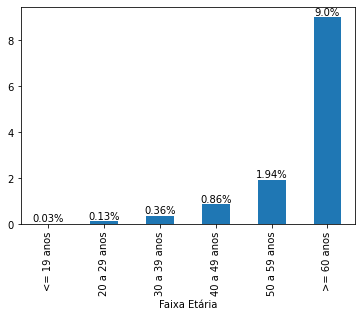

In [37]:
# Probabilidade de morrer dado a idade para homens
df = homem_df[homem_df["Óbito"] == "Sim"].groupby("Faixa Etária").size().divide(homem_df.groupby("Faixa Etária").size()).mul(100)
df['Faixa Etária'] = df.index
key = df['Faixa Etária'].map(mapping)
ax = df.iloc[key.argsort()].plot(kind="bar")
for p in ax.patches:
    ax.annotate(
        f"{np.round(p.get_height(),decimals=2)}%", 
        (p.get_x()+p.get_width()/2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )

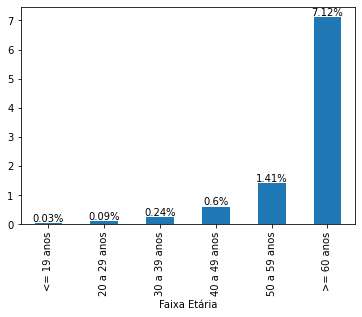

In [38]:
#Probabilidade de morrer dado idade ambos os generos
df = covid_df[covid_df["Óbito"] == "Sim"].groupby("Faixa Etária").size().divide(covid_df.groupby("Faixa Etária").size()).mul(100)
df['Faixa Etária'] = df.index
key = df['Faixa Etária'].map(mapping)
ax = df.iloc[key.argsort()].plot(kind="bar")
for p in ax.patches:
    ax.annotate(
        f"{np.round(p.get_height(),decimals=2)}%", 
        (p.get_x()+p.get_width()/2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 5), 
        textcoords='offset points'
    )